In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
np.random.seed(42)

COMPRESOR A

In [2]:
a = pd.read_csv('../Datos/Originales/Compresores/CompA.csv')
a.head()

,Presion,Temperatura,Frecuencia,Potencia_Medida,Potencia_Estimada
0,0.775748,16.9,0.0,71.466562,77.432556
1,0.776315,16.6,0.0,71.442768,77.498194
2,0.776784,16.6,0.0,71.347653,77.477151
3,0.777093,16.4,0.0,71.244807,77.524010
4,0.777436,16.4,0.0,71.194101,77.508609


In [3]:
a1 = a.drop(columns=['Potencia_Estimada'])

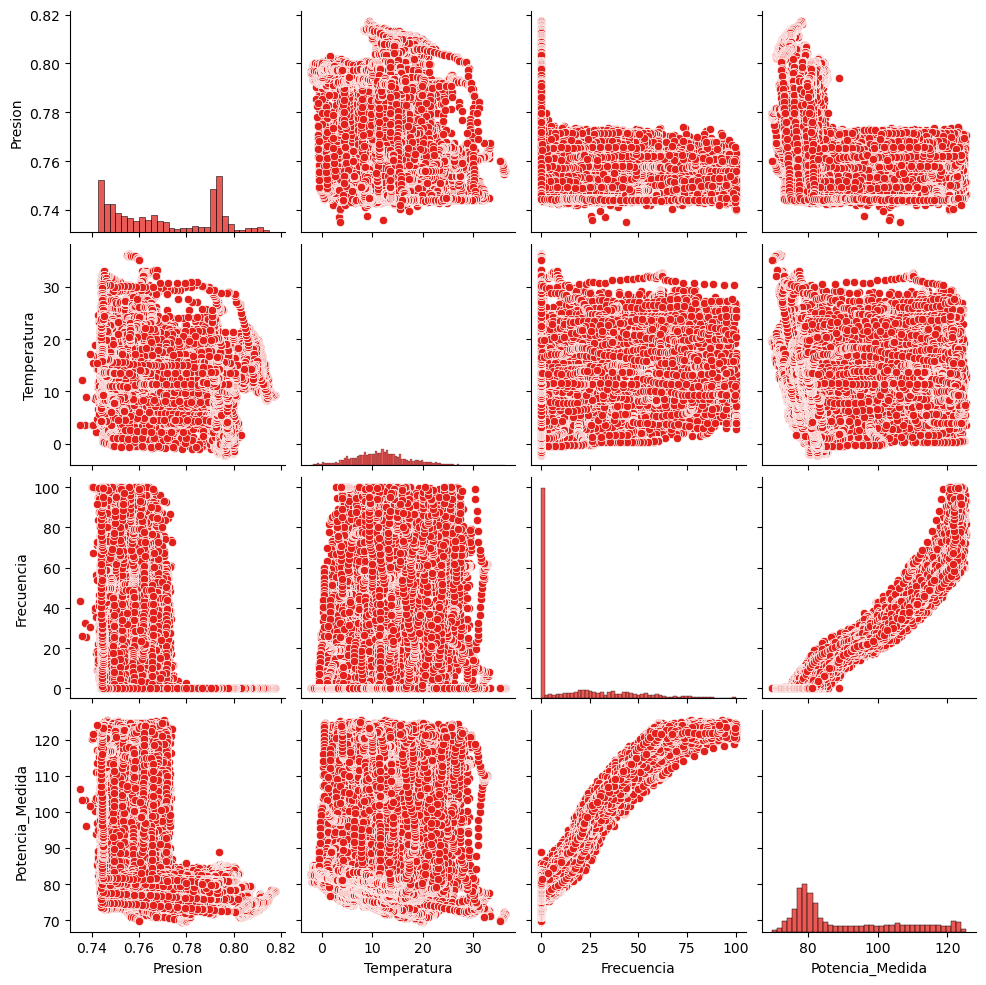

In [4]:
sns.pairplot(a1, diag_kws={'color':'#e2211c'}, plot_kws={'color':'#e2211c'})

<Axes: >

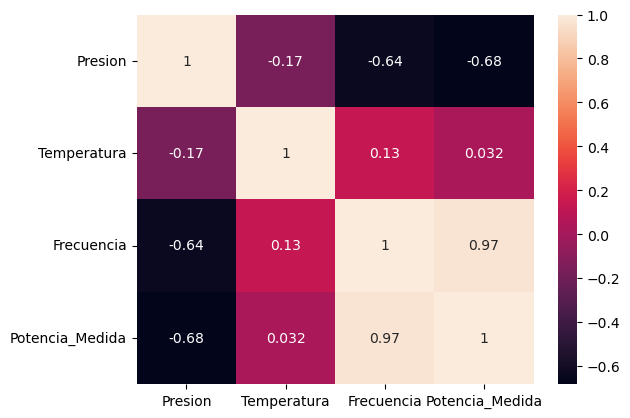

In [10]:
import seaborn as sns
sns.heatmap(a1.corr(), annot=True)

In [6]:
a.shape

(39321, 5)

In [7]:
from sklearn.model_selection import train_test_split

Xa = a.drop(['Potencia_Medida', 'Potencia_Estimada'], axis=1)
ya = a['Potencia_Medida']

Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, train_size=0.65, random_state=42)

print(Xa_train.shape, Xa_test.shape)
print(ya_train.shape,  ya_test.shape)

(25558, 3) (13763, 3)
(25558,) (13763,)


In [8]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import TweedieRegressor
from sklearn.model_selection import cross_val_score,cross_validate, GridSearchCV

In [9]:
models=[LinearRegression(),Lasso(max_iter=1000),Ridge(max_iter=1000),ElasticNet(max_iter=1000),TweedieRegressor(max_iter=10000)]

for model in models:
    cv_score=cross_validate(model,Xa,ya,scoring=['neg_mean_absolute_error','r2'],cv=5)
    
    mean_mae = sum(cv_score['test_neg_mean_absolute_error'])/len(cv_score['test_neg_mean_absolute_error'])
    mean_r2 = sum(cv_score['test_r2'])/len(cv_score['test_r2'])
    print("MAE for model",model,'=',mean_mae)
    print("R2 for model",model,'=',mean_r2)

MAE for model LinearRegression() = -2.9556558009203364
R2 for model LinearRegression() = 0.9387421330464865
MAE for model Lasso() = -2.960187647824318
R2 for model Lasso() = 0.9315217972051822
MAE for model Ridge(max_iter=1000) = -2.930334842948983
R2 for model Ridge(max_iter=1000) = 0.9388181336612004
MAE for model ElasticNet() = -2.955722350710802
R2 for model ElasticNet() = 0.9315476279850472
MAE for model TweedieRegressor(max_iter=10000) = -2.9528902683089084
R2 for model TweedieRegressor(max_iter=10000) = 0.9315383314344274


In [10]:
model_hyperparameters = {
    'lin_reg':{
      
    },
    'lasso_reg':{
        'alpha':[0.5,1,5,10,20]        
    },
    'ridge_reg':{
        'alpha':[0.5,1,5,10,20]        
    },
    'elastic_reg':{
        'alpha':[0.5,1,5,10,20],
        'l1_ratio':[0.1,0.3,0.5,0.7,0.9]        
    },
    'tweedie_reg':{
        'power':[0,1,2,3],
        'alpha':[0, 0.5, 1, 5, 10, 20],    
        'link':['log','identity']    
    }
}

In [11]:
model_keys=list(model_hyperparameters.keys())

In [12]:
result = []
i=0

for model in models:
    key=model_keys[i]
    i+=1
    params = model_hyperparameters[key]

    regressor=GridSearchCV(model,params,cv=5,scoring=['r2'],refit='r2')

    regressor.fit(Xa,ya)
    result.append({
        'model_used':model,
        'highest_score':regressor.best_score_,
        'best hyperparameters':regressor.best_params_
    })

pd.DataFrame(result)

,model_used,highest_score,best hyperparameters
0,LinearRegression(),0.938742,{}
1,Lasso(),0.931522,{'alpha': 1}
2,Ridge(max_iter=1000),0.938818,{'alpha': 1}
3,ElasticNet(),0.931753,"{'alpha': 5, 'l1_ratio': 0.1}"
4,TweedieRegressor(max_iter=10000),0.938742,"{'alpha': 0, 'link': 'identity', 'power': 0}"


LINEAL

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xa_train, ya_train)

print("Train RMSE: ", root_mean_squared_error(ya_train, lr.predict(Xa_train)))
print("Train R2: ", r2_score(ya_train, lr.predict(Xa_train)))

print("Test RSE: ", mean_squared_error(ya_test, lr.predict(Xa_test)))
print("Test R2: ", r2_score(ya_test, lr.predict(Xa_test)))

n_scores = cross_val_score(lr, Xa, ya, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  3.451629365005519
Train R2:  0.9502465841573353
Test RSE:  12.314054703380666
Test R2:  0.9501377112959903
R2: 0.939 (0.029)


In [14]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(Xa_train, ya_train)

print("Train RMSE: ", root_mean_squared_error(ya_train, lasso.predict(Xa_train)))
print("Train R2: ", r2_score(ya_train, lasso.predict(Xa_train)))

print("Test RMSE: ", root_mean_squared_error(ya_test, lasso.predict(Xa_test)))
print("Test R2: ", r2_score(ya_test, lasso.predict(Xa_test)))

n_scores = cross_val_score(lasso, Xa, ya, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  3.740096948327433
Train R2:  0.9415828571286986
Test RMSE:  3.824734140218106
Test R2:  0.9407656488882894
R2: 0.932 (0.014)


In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1, max_iter=1000)
ridge.fit(Xa_train, ya_train)

print("Train RMSE: ", root_mean_squared_error(ya_train, ridge.predict(Xa_train)))
print("Train R2: ", r2_score(ya_train, ridge.predict(Xa_train)))

print("Test RMSE: ", root_mean_squared_error(ya_test, ridge.predict(Xa_test)))
print("Test R2: ", r2_score(ya_test, ridge.predict(Xa_test)))

n_scores = cross_val_score(ridge, Xa, ya, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  3.456737325143438
Train R2:  0.95009921809696
Test RMSE:  3.5190350753842528
Test R2:  0.949856075413403
R2: 0.939 (0.027)


In [16]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha= 5, l1_ratio=0.1)
elastic.fit(Xa_train, ya_train)

print("Train RMSE: ", root_mean_squared_error(ya_train, elastic.predict(Xa_train)))
print("Train R2: ", r2_score(ya_train, elastic.predict(Xa_train)))

print("Test RMSE: ", root_mean_squared_error(ya_test, elastic.predict(Xa_test)))
print("Test R2: ", r2_score(ya_test, elastic.predict(Xa_test)))

n_scores = cross_val_score(elastic, Xa, ya, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  3.7475027921606547


Train R2:  0.9413512820805858
Test RMSE:  3.8299485547166308
Test R2:  0.9406040256239974
R2: 0.932 (0.013)


In [17]:
from sklearn.linear_model import TweedieRegressor

tweedie = TweedieRegressor(alpha= 0, link= 'identity', power= 0)
tweedie.fit(Xa_train, ya_train)

print("Train RMSE: ", root_mean_squared_error(ya_train, tweedie.predict(Xa_train)))
print("Train R2: ", r2_score(ya_train, tweedie.predict(Xa_train)))

print("Test RMSE: ", root_mean_squared_error(ya_test, tweedie.predict(Xa_test)))
print("Test R2: ", r2_score(ya_test, tweedie.predict(Xa_test)))

n_scores = cross_val_score(tweedie, Xa, ya, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  3.4516293650055765
Train R2:  0.9502465841573338
Test RMSE:  3.509138753484871
Test R2:  0.9501377109403528
R2: 0.939 (0.029)


KERNEL

In [18]:
from sklearn.svm import SVR

svr = SVR(kernel= 'rbf')
svr.fit(Xa_train, ya_train)

print("Train RMSE: ", root_mean_squared_error(ya_train, svr.predict(Xa_train)))
print("Train R2: ", r2_score(ya_train, svr.predict(Xa_train)))

print("Test RMSE: ", root_mean_squared_error(ya_test, svr.predict(Xa_test)))
print("Test R2: ", r2_score(ya_test, svr.predict(Xa_test)))

n_scores = cross_val_score(svr, Xa, ya, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  2.381444536165732
Train R2:  0.9763159736807249
Test RMSE:  2.4036778429034453
Test R2:  0.9766049676139544
R2: 0.968 (0.023)


ARBOLES

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [20]:
models=[DecisionTreeRegressor(), RandomForestRegressor()]

for model in models:
    cv_score=cross_validate(model,Xa,ya,scoring=['neg_mean_absolute_error','r2'],cv=5)
    
    mean_mae = sum(cv_score['test_neg_mean_absolute_error'])/len(cv_score['test_neg_mean_absolute_error'])
    mean_r2 = sum(cv_score['test_r2'])/len(cv_score['test_r2'])
    print("MAE for model",model,'=',mean_mae)
    print("R2 for model",model,'=',mean_r2)

MAE for model DecisionTreeRegressor() = -2.7050037974064756
R2 for model DecisionTreeRegressor() = 0.9495368807459672
MAE for model RandomForestRegressor() = -2.4144966480928383
R2 for model RandomForestRegressor() = 0.9606298707399071


In [21]:
model_hyperparameters = {
    'decision_tree': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'random_forest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 5, 12],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
}

In [22]:
model_keys=list(model_hyperparameters.keys())

In [23]:
result = []
i=0

for model in models:
    key=model_keys[i]
    i+=1
    params = model_hyperparameters[key]

    regressor=GridSearchCV(model,params,cv=5,scoring=['r2'],refit='r2')

    regressor.fit(Xa,ya)
    result.append({
        'model_used':model,
        'highest_score':regressor.best_score_,
        'best hyperparameters':regressor.best_params_
    })

pd.DataFrame(result)

,model_used,highest_score,best hyperparameters
0,DecisionTreeRegressor(),0.961053,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."
1,RandomForestRegressor(),0.962932,"{'max_depth': 12, 'min_samples_leaf': 1, 'min_..."


In [24]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth= 3)
dt.fit(Xa_train, ya_train)

print("Train RMSE: ", root_mean_squared_error(ya_train, dt.predict(Xa_train)))
print("Train R2: ", r2_score(ya_train, dt.predict(Xa_train)))

print("Test RMSE: ", root_mean_squared_error(ya_test, dt.predict(Xa_test)))
print("Test R2: ", r2_score(ya_test, dt.predict(Xa_test)))

n_scores = cross_val_score(dt, Xa, ya, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  3.0286219314000467
Train R2:  0.9616941839878388
Test RMSE:  3.065010437497207
Test R2:  0.9619604784393944
R2: 0.948 (0.014)


In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth= 3)
rf.fit(Xa_train, ya_train)

print("Train RMSE: ", root_mean_squared_error(ya_train, rf.predict(Xa_train)))
print("Train R2: ", r2_score(ya_train, rf.predict(Xa_train)))

print("Test RMSE: ", root_mean_squared_error(ya_test, rf.predict(Xa_test)))
print("Test R2: ", r2_score(ya_test, rf.predict(Xa_test)))

n_scores = cross_val_score(rf, Xa, ya, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  2.8991784506223146
Train R2:  0.9648985959601655
Test RMSE:  2.925708507888528
Test R2:  0.965339626396032
R2: 0.951 (0.014)


BOOSTING

In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [27]:
models=[GradientBoostingRegressor(), XGBRegressor()]

for model in models:
    cv_score=cross_validate(model,Xa,ya,scoring=['neg_mean_absolute_error','r2'],cv=5)
    
    mean_mae = sum(cv_score['test_neg_mean_absolute_error'])/len(cv_score['test_neg_mean_absolute_error'])
    mean_r2 = sum(cv_score['test_r2'])/len(cv_score['test_r2'])
    print("MAE for model",model,'=',mean_mae)
    print("R2 for model",model,'=',mean_r2)

MAE for model GradientBoostingRegressor() = -2.2723329515394632
R2 for model GradientBoostingRegressor() = 0.9657710089677305
MAE for model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) = -2.355242146151141
R2 for model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsam

In [28]:
model_hyperparameters = {
    'gradient_boosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'xgboost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 1.0]
    }
}

In [29]:
model_keys=list(model_hyperparameters.keys())

In [30]:
result = []
i=0

for model in models:
    key=model_keys[i]
    i+=1
    params = model_hyperparameters[key]

    regressor=GridSearchCV(model,params,cv=5,scoring=['r2'],refit='r2')

    regressor.fit(Xa,ya)
    result.append({
        'model_used':model,
        'highest_score':regressor.best_score_,
        'best hyperparameters':regressor.best_params_
    })

pd.DataFrame(result)

,model_used,highest_score,best hyperparameters
0,GradientBoostingRegressor(),0.965774,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
1,"XGBRegressor(base_score=None, booster=None, ca...",0.965992,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."


In [31]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 3, n_estimators= 100)
gb.fit(Xa_train, ya_train)

print("Train RMSE: ", root_mean_squared_error(ya_train, gb.predict(Xa_train)))
print("Train R2: ", r2_score(ya_train, gb.predict(Xa_train)))

print("Test RMSE: ", root_mean_squared_error(ya_test, gb.predict(Xa_test)))
print("Test R2: ", r2_score(ya_test, gb.predict(Xa_test)))

n_scores = cross_val_score(gb, Xa, ya, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  1.977265576143748
Train R2:  0.9836730672693997
Test RMSE:  2.0139584959344847
Test R2:  0.9835762561517634
R2: 0.966 (0.023)


In [32]:
from xgboost import XGBRegressor

xgb = XGBRegressor(learning_rate =0.1, max_depth= 3, n_estimators= 100, subsample= 1.0)
xgb.fit(Xa_train, ya_train)

print("Train RMSE: ", root_mean_squared_error(ya_train, xgb.predict(Xa_train)))
print("Train R2: ", r2_score(ya_train, xgb.predict(Xa_train)))

print("Test RMSE: ", root_mean_squared_error(ya_test, xgb.predict(Xa_test)))
print("Test R2: ", r2_score(ya_test, xgb.predict(Xa_test)))

n_scores = cross_val_score(xgb, Xa, ya, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  1.9825418228077016
Train R2:  0.9835858155998479
Test RMSE:  2.0128560152773685
Test R2:  0.983594232593602
R2: 0.966 (0.023)


STACKING

In [33]:
from sklearn.ensemble import StackingRegressor
estimators = [
    ('rf', RandomForestRegressor(max_depth= 12, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 50)),
    ('svr', SVR(kernel='rbf')),
    ('XGBoost', XGBRegressor(learning_rate= 0.1, max_depth= 3, n_estimators= 100, subsample= 1.0)),
    ('ridge', Ridge(alpha=1, max_iter=1000))
]

stacking_model_a = StackingRegressor(
    estimators=estimators,
    final_estimator= LinearRegression(),
    cv=5
)

stacking_model_a.fit(Xa_train, ya_train)

print("Train RMSE: ", root_mean_squared_error(ya_train, stacking_model_a.predict(Xa_train)))
print("Train R2: ", r2_score(ya_train, stacking_model_a.predict(Xa_train)))

print("Test RMSE: ", root_mean_squared_error(ya_test, stacking_model_a.predict(Xa_test)))
print("Test R2: ", r2_score(ya_test, stacking_model_a.predict(Xa_test)))

n_scores = cross_val_score(stacking_model_a, Xa, ya, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  1.5036557198434182
Train R2:  0.9905578387289231
Test RMSE:  1.8075806666069123
Test R2:  0.9867697970709267
R2: 0.967 (0.021)


In [34]:
import joblib

# Suponiendo que tienes modelos ya entrenados
joblib.dump(stacking_model_a, 'modelo_a.pkl')

['modelo_a.pkl']